In [55]:
import pandas as pd
import numpy
import scipy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("./training.csv")

In [62]:
df[:50]

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State,dayOfWeek
0,1000,1,1,3,False,True,True,True,No,True,False,True,HOUSTON,TX,2
1,1000,1,2,5,False,True,True,True,No,True,False,True,HOUSTON,TX,2
2,1000,1,3,6,False,True,True,True,No,True,False,True,HOUSTON,TX,2
3,1000,1,4,3,False,True,True,True,No,True,False,True,HOUSTON,TX,2
4,1000,2,1,13,False,True,True,True,No,True,False,True,HOUSTON,TX,3
5,1000,2,2,31,False,True,True,True,No,True,False,True,HOUSTON,TX,3
6,1000,2,3,63,False,True,True,True,No,True,False,True,HOUSTON,TX,3
7,1000,2,4,47,False,True,True,True,No,True,False,True,HOUSTON,TX,3
8,1000,3,1,10,False,True,True,True,No,True,False,True,HOUSTON,TX,4
9,1000,3,2,27,False,True,True,True,No,True,False,True,HOUSTON,TX,4


In [57]:
#Add weeks
df["dayOfWeek"] = df["dayOfTheYear"]%7 + 1

In [48]:
def plot(df, indep_var, dep_var):
    plt.scatter(df[indep_var], df[dep_var])
    plt.xlabel("Day of Year")
    plt.ylabel("Gross Sold")
    plt.grid(True)
    plt.show()

In [49]:
store1 = df[df["StoreNumber"] == 1000]
store2 = df[df["StoreNumber"] == 2000]
store3 = df[df["StoreNumber"] == 3000]
store4 = df[df["StoreNumber"] == 4000]

bucket1 = df[df["3HourBucket"] == 1]
bucket2 = df[df["3HourBucket"] == 2]
bucket3 = df[df["3HourBucket"] == 3]
bucket4 = df[df["3HourBucket"] == 4]

In [50]:
def plot(df, indep_var, dep_var):
    plt.scatter(df[indep_var], df[dep_var])
    plt.xlabel("Day of Year")
    plt.ylabel("Gross Sold")
    plt.grid(True)
    plt.show()

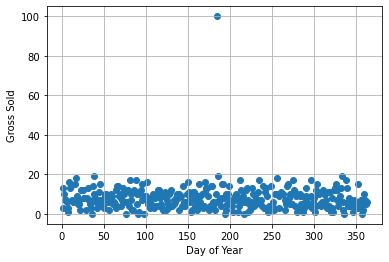

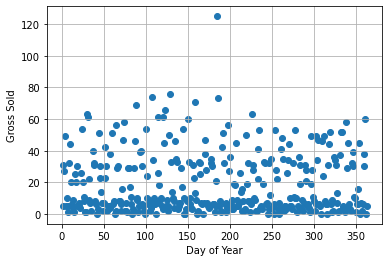

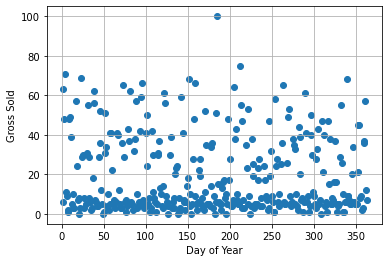

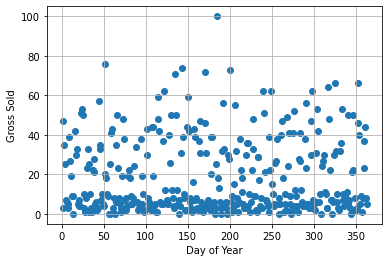

In [51]:
store_11 = pd.merge(store1, bucket1)
store_12 = pd.merge(store1, bucket2)
store_13 = pd.merge(store1, bucket3)
store_14 = pd.merge(store1, bucket4)

plot(store_11, "dayOfTheYear", "GrossSoldQuantity")
plot(store_12, "dayOfTheYear", "GrossSoldQuantity")
plot(store_13, "dayOfTheYear", "GrossSoldQuantity")
plot(store_14, "dayOfTheYear", "GrossSoldQuantity")